In [3]:
def find_f(num):
    switch = {
        10: (1.0247, 0.7217),
        1: (0.9273, 0.5346),
        2: (1.0247, 0.5346),
        3: (1.1328, 0.5346),
        4: (0.9273, 0.5906),
        5: (1.0247, 0.5906),
        6: (1.1328, 0.5906),
        7: (0.9273, 0.6535),
        8: (1.0247, 0.6535),
        9: (1.1328, 0.6535)
    }
    return switch.get(num, (0, 0))


In [4]:
import numpy as np

def tone(num):
    n = np.arange(1000)
    w1, w2 = find_f(num)
    t = np.sin(w1 * n) + np.sin(w2 * n)
    return t


In [5]:
import numpy as np

def create_signal_y(L, A1, A2, w1, w2, phase1, phase2):
    w = np.hamming(L)
    y = np.zeros(L, dtype=np.complex)
    for i in range(L):
        y[i] = w[i] * (A1 * np.exp(1j * (w1 * i + phase1)) + A2 * np.exp(1j * (w2 * i + phase2)))
    return y



In [6]:
import numpy as np

def ttdecode(input_signal):
    number_of_input_samples = len(input_signal)
    usefull_samples = []
    i = 0  
    while i < number_of_input_samples:
        if input_signal[i] != 0:
            sample_segment = input_signal[i:i+1000] 
            if len(sample_segment) == 1000:
                usefull_samples.append(sample_segment)
            i += 999  
        i += 1
    
    usefull_samples = np.array(usefull_samples)
    energy_usefull = np.abs(np.fft.fft(usefull_samples, axis=1))**2
    g_usefull = [np.where(energy > 100000)[0] for energy in energy_usefull]
    
    list_of_usefull_k = np.array([g[:2] for g in g_usefull if len(g) >= 2])
    
    list_of_ks = np.array([
        [85, 148], [85, 163], [85, 180],
        [94, 148], [94, 163], [94, 180],
        [104, 148], [104, 163], [104, 180],
        [115, 163]
    ])
    
    vector = []
    for usefull_k in list_of_usefull_k:
        for k, ks in enumerate(list_of_ks, start=1):
            if np.array_equal(usefull_k, ks):
                vector.append(k % 10) 
                break
    
    return np.array(vector)



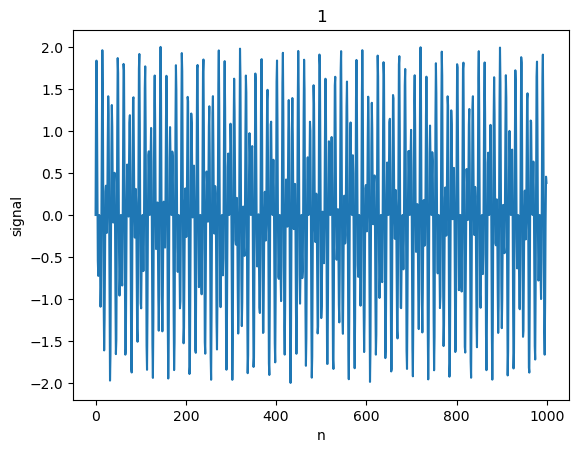

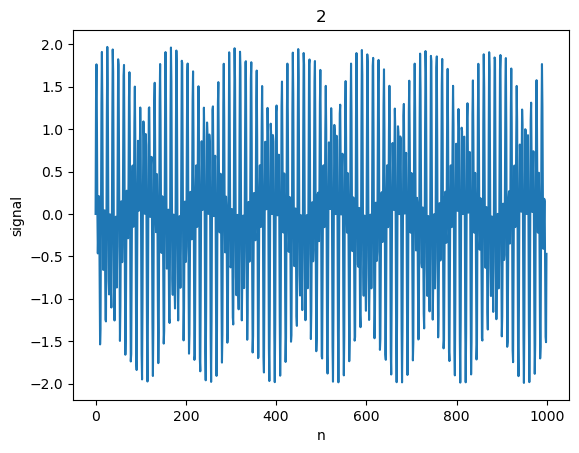

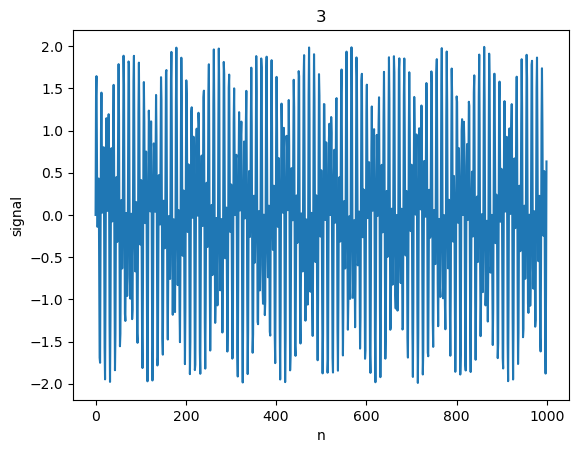

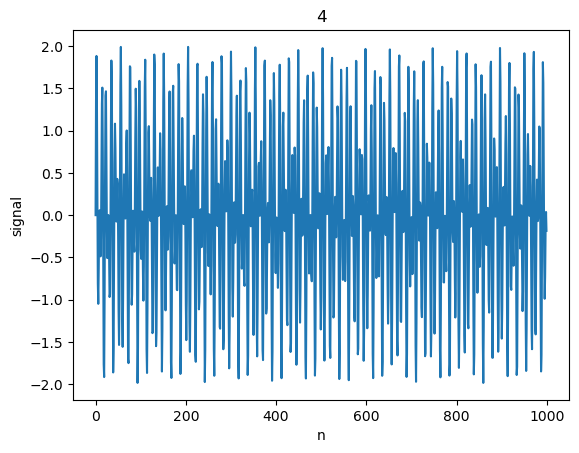

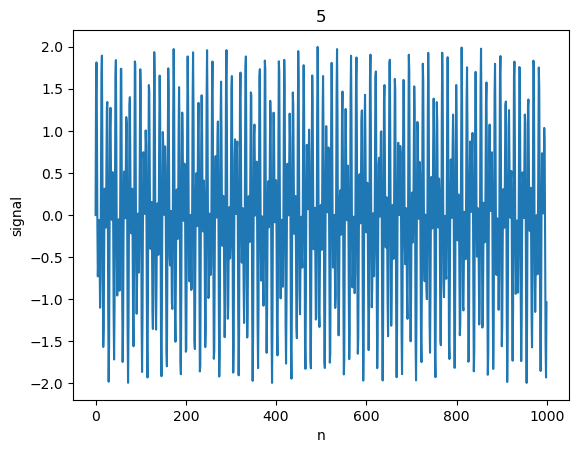

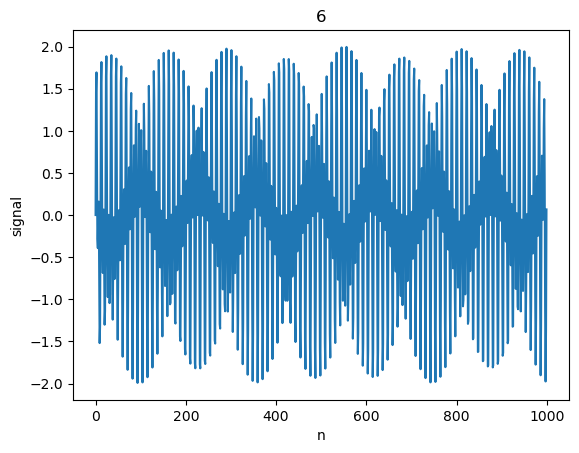

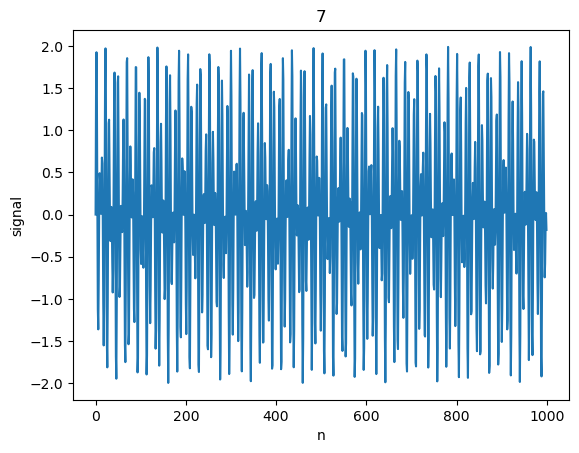

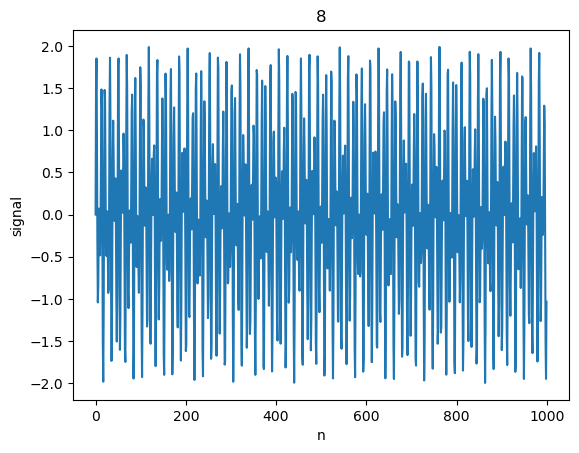

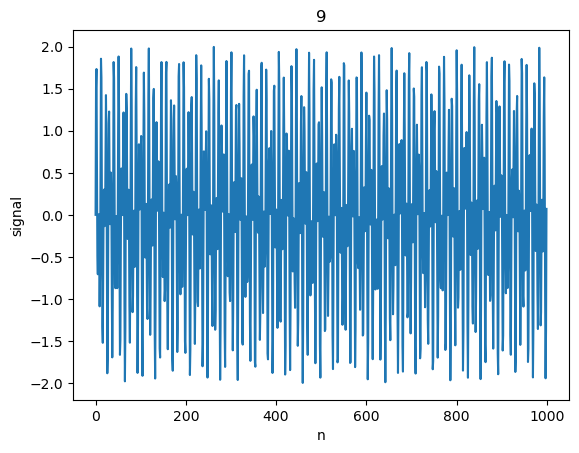

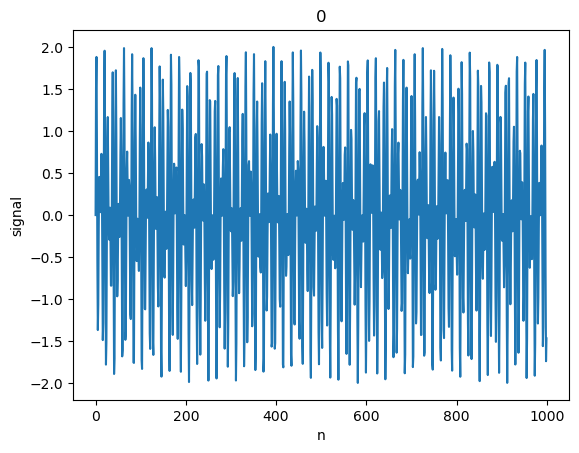

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

for i in range(1, 11):
    b = tone(i)
    display(Audio(tone(i), rate=8192))
    plt.figure()
    plt.plot(b)
    plt.title(str(i % 10))
    plt.xlabel('n')
    plt.ylabel('signal')
    plt.show()

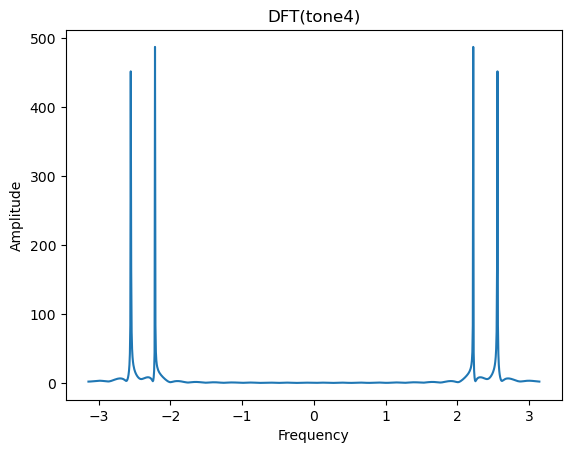

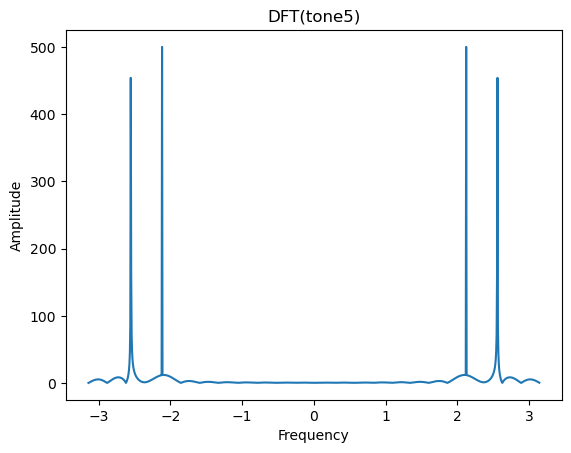

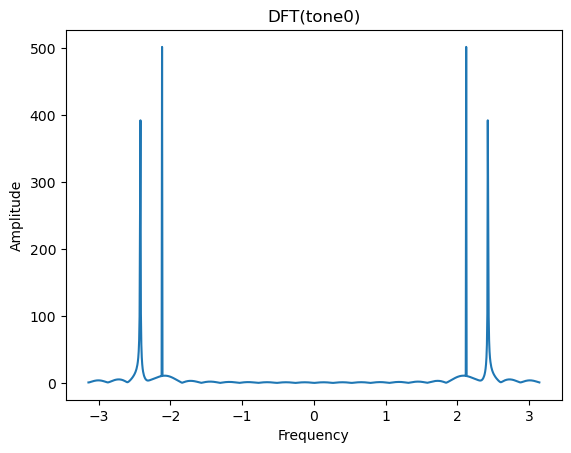

In [8]:
import numpy as np
import matplotlib.pyplot as plt


n1 = np.linspace(-np.pi, np.pi, 1024)
disfour4 = np.fft.fft(tone(4), 1024)
disfour5 = np.fft.fft(tone(5), 1024)
disfour10 = np.fft.fft(tone(10), 1024)

plt.figure()
plt.plot(n1, np.abs(disfour4))
plt.title('DFT(tone4)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(n1, np.abs(disfour5))
plt.title('DFT(tone5)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.figure()
plt.plot(n1, np.abs(disfour10))
plt.title('DFT(tone0)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

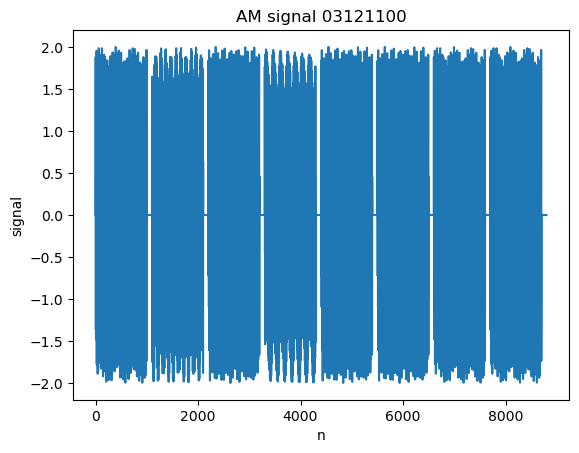

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def sil(duration):
    return np.zeros(int(duration))

silence = sil(100)

s = np.concatenate((tone(10), silence, tone(3), silence, tone(1), silence, tone(2), silence, tone(1), silence, tone(1), silence, tone(10), silence, tone(10), silence))

plt.figure()
plt.plot(s)
plt.title('AM signal 03121100')
plt.xlabel('n')
plt.ylabel('signal')
plt.show()

import sounddevice as sd
sd.play(s, 8192)

normalized = np.int16((s / s.max()) * 32767)
wavfile.write('tone_sequence.wav', 8192, normalized)

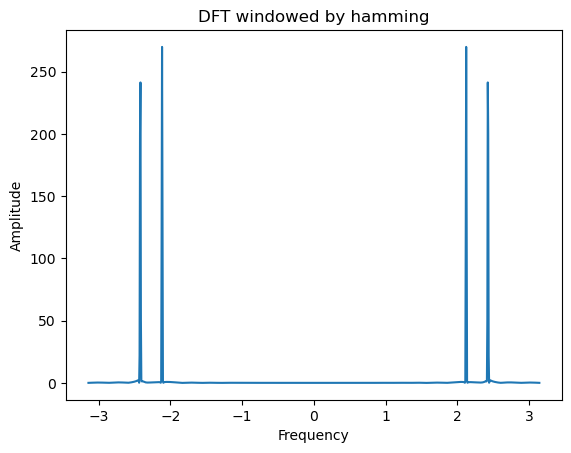

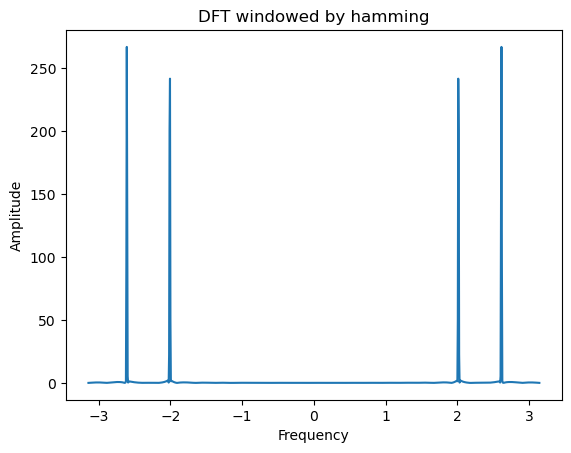

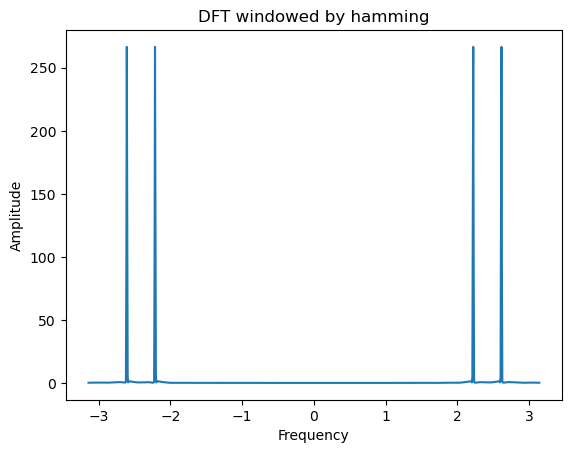

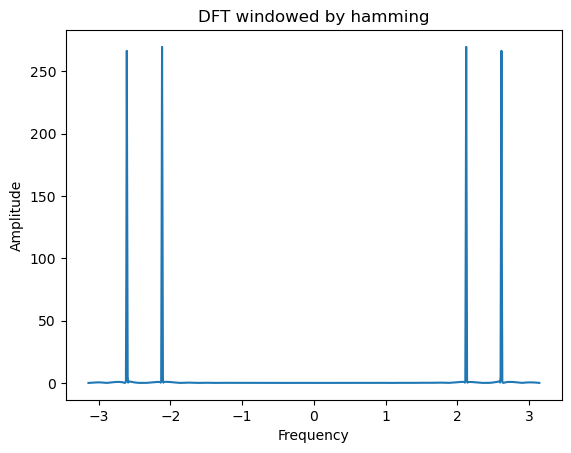

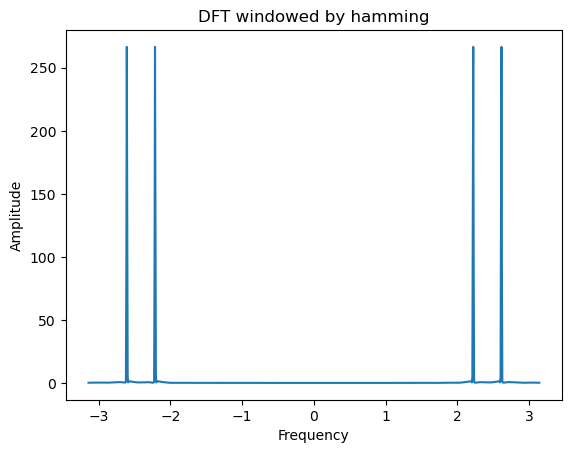

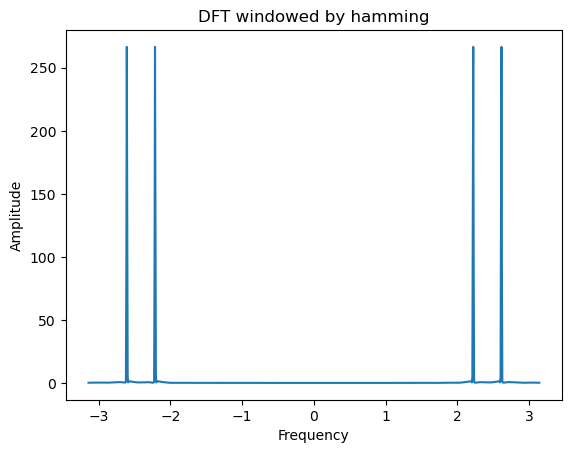

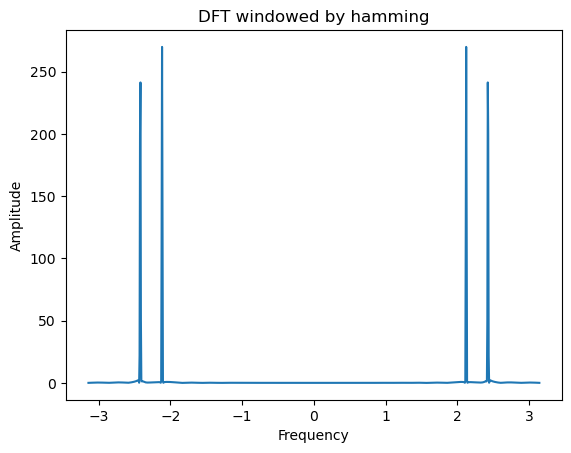

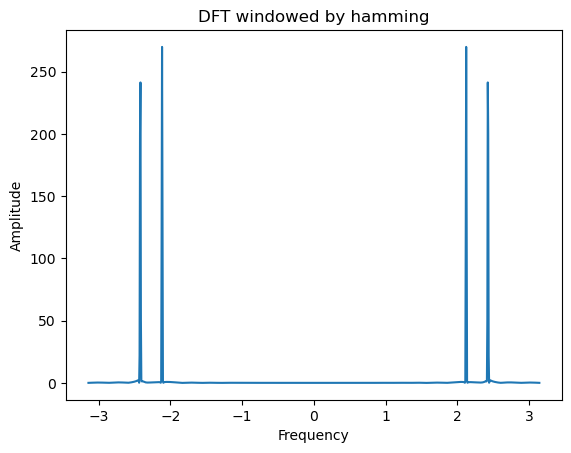

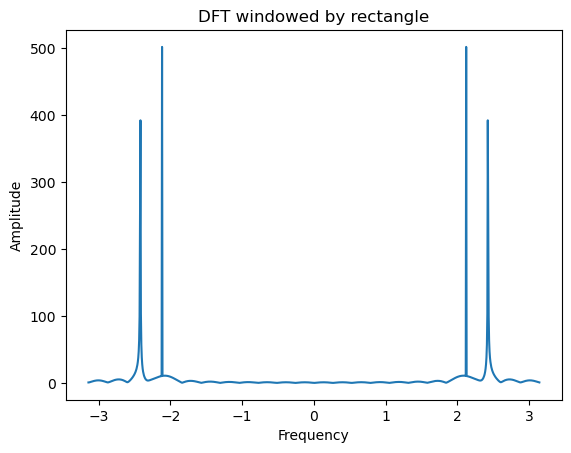

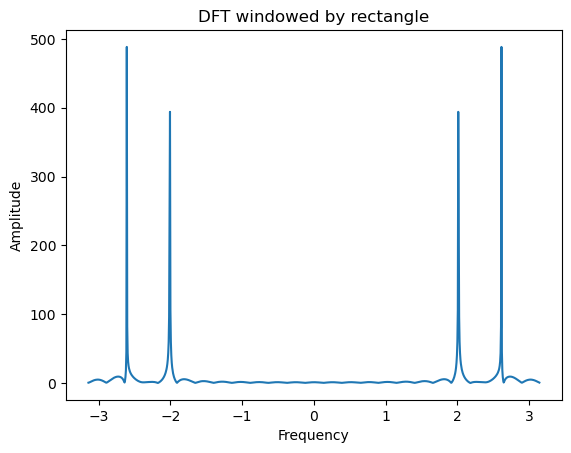

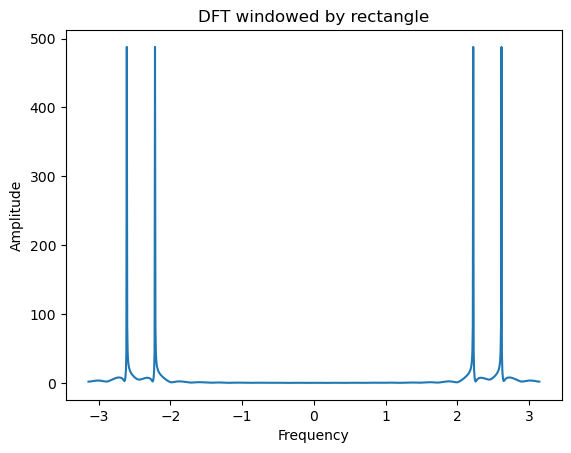

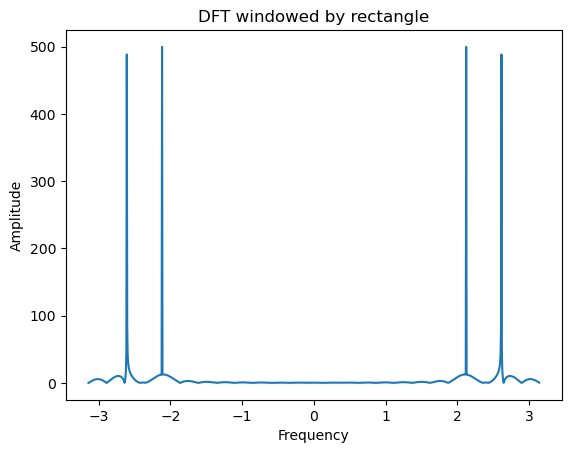

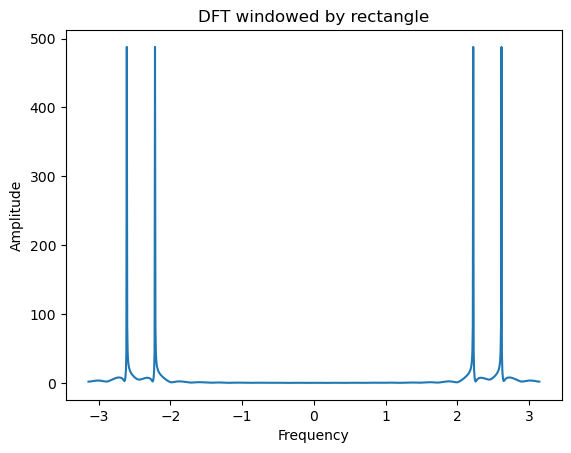

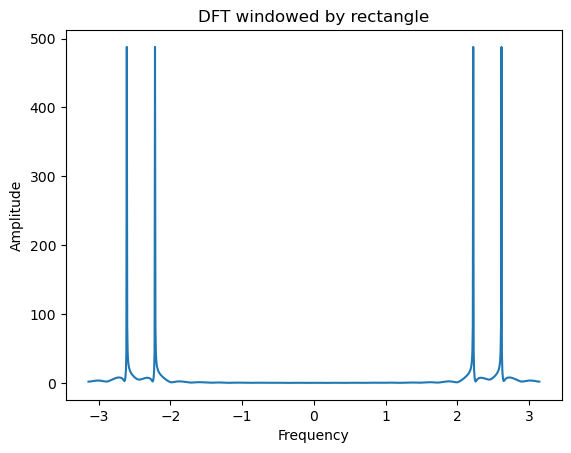

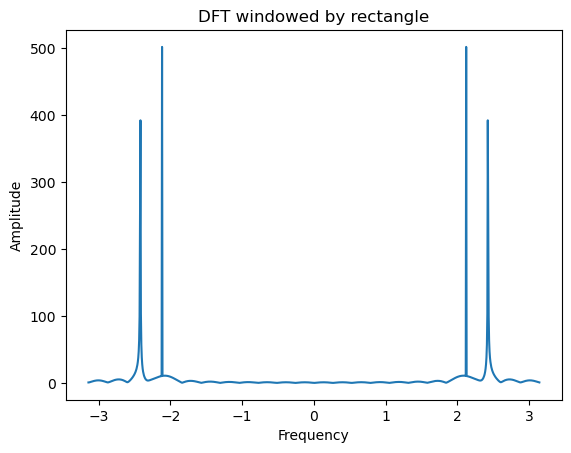

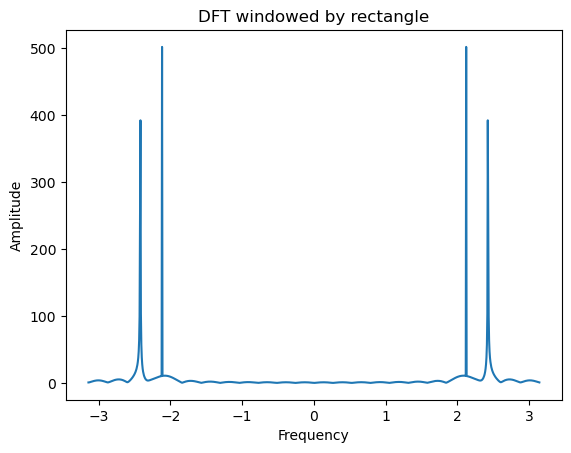

In [89]:
import numpy as np
import matplotlib.pyplot as plt

n1 = np.linspace(-np.pi, np.pi, 1024)

for i in range (0, 8):
    window_length = 1000  
    shift_amount = 1100  
    start_index = i*1100 
    hamming_window = np.hamming(window_length)
    signal = np.zeros(8800)
    shifted_hamming_window = np.zeros_like(signal)
    shifted_hamming_window[start_index:start_index + window_length] = hamming_window
    signal[:len(shifted_hamming_window)] += shifted_hamming_window
    result_signal = s * signal
    shifted_signal = np.roll(result_signal, -start_index)
    cut_signal = shifted_signal[:1100]
    final_signal = np.fft.fft(cut_signal, 1024)
    plt.figure()
    plt.plot(n1, abs(final_signal))
    plt.title('DFT windowed by hamming')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()

    
    
for i in range (0, 8):
    window_length = 1000  
    shift_amount = 1100  
    start_index = i*1100 
    rect_window = np.ones(window_length)
    signal = np.zeros(8800)
    shifted_hamming_window = np.zeros_like(signal)
    shifted_hamming_window[start_index:start_index + window_length] = rect_window
    signal[:len(shifted_hamming_window)] += shifted_hamming_window
    result_signal = s * signal
    shifted_signal = np.roll(result_signal, -start_index)
    cut_signal = shifted_signal[:1100]
    final_signal = np.fft.fft(cut_signal, 1024)
    plt.figure()
    plt.plot(n1, abs(final_signal))
    plt.title('DFT windowed by rectangle')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.show()

In [90]:
import numpy as np
efft = np.zeros((10, 1000), dtype=float)
g = np.zeros((10, 2), dtype=int)
list_of_k = np.zeros((10, 2), dtype=int)
list_of_w = np.zeros((10, 2), dtype=float)

for i in range(1, 11):
    w1, w2 = find_f(i)
    n = np.arange(1000)
    tone_i = np.sin(w1 * n) + np.sin(w2 * n)
    efft[i-1, :] = (np.abs(np.fft.fft(tone_i))) ** 2
    g[i-1, :] = np.argwhere(efft[i-1, :] > 100000).flatten()[:2] 

for i in range(10):
    for j in range(2):
        list_of_k[i, j] = g[i, j]

for i in range(10):
    for j in range(2):
        list_of_w[i, j] = (2 * np.pi * list_of_k[i, j]) / 1000
        
print("list_of_k:")
print(list_of_k)

print("list_of_w:")
print(list_of_w)

list_of_k:
[[ 85 148]
 [ 85 163]
 [ 85 180]
 [ 94 148]
 [ 94 163]
 [ 94 180]
 [104 148]
 [104 163]
 [104 180]
 [115 163]]
list_of_w:
[[0.53407075 0.92991143]
 [0.53407075 1.02415921]
 [0.53407075 1.13097336]
 [0.59061942 0.92991143]
 [0.59061942 1.02415921]
 [0.59061942 1.13097336]
 [0.65345127 0.92991143]
 [0.65345127 1.02415921]
 [0.65345127 1.13097336]
 [0.72256631 1.02415921]]


In [91]:
ttdecode(s)

array([0, 3, 1, 2, 1, 1, 0, 0])

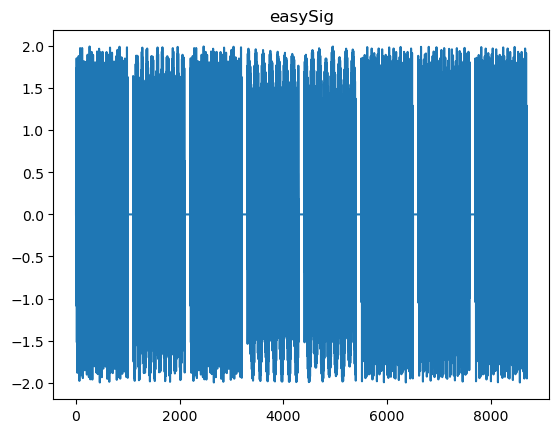

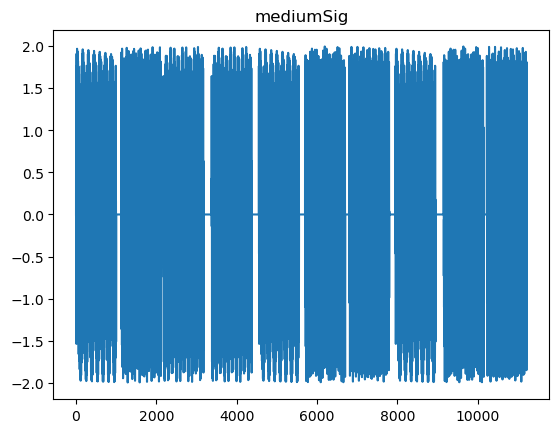

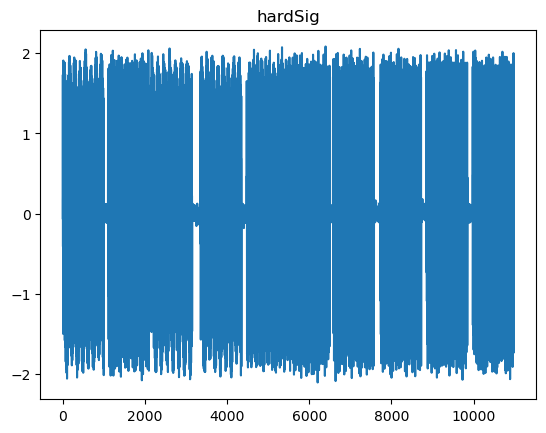

From decoding easySig is:
[9 3 9 2 6 8 4]
From decoding mediumSig is:
[2 7 3 3 2 5 4 2 5]
From decoding hardSig is:
[6 9 2 9 1]


In [92]:
import numpy as np
import matplotlib.pyplot as plt

input_easySig_signal = np.load('easy_sig.npy')
input_mediumSig_signal = np.load('medium_sig.npy')
input_hardSig_signal = np.load('hard_sig.npy')

plt.figure()
plt.plot(input_easySig_signal)
plt.title('easySig')
plt.show()

plt.figure()
plt.plot(input_mediumSig_signal)
plt.title('mediumSig')
plt.show()

plt.figure()
plt.plot(input_hardSig_signal)
plt.title('hardSig')
plt.show()

easySig_Vector = ttdecode(input_easySig_signal)
mediumSig_Vector = ttdecode(input_mediumSig_signal)
hardSig_Vector = ttdecode(input_hardSig_signal)


print("easySig:")
print(easySig_Vector)
print("mediumSig:")
print(mediumSig_Vector)
print("hardSig:")
print(hardSig_Vector)